In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# IMPORTING PACKAGES

#NumPy is a Python library with which we can perform different mathematical operations on arrays.
#Pandas is a Python library used for analyzing and manupulating the data.
#Matplotlib.pyplot is a plotting library in Python used for data visualizations. 
#Seaborn is a Python data visualization library built on top of Matplotlib, designed to make it easier to create visually appealing and informative statistical graphics.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data reading and studying

In [4]:
# Reading the data from the dataset

gdp = pd.read_csv('India_GDP_1960-2022.csv')
gdp

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,0.0,2021,3173.4,182160,8.95
2,1.0,2020,2667.69,154640,-6.6
3,2.0,2019,2831.55,165760,3.74
4,3.0,2018,2702.93,159840,6.45
...,...,...,...,...,...
58,57.0,1964,56.48,9280,7.45
59,58.0,1963,48.42,8080,5.99
60,59.0,1962,42.16,7200,2.93
61,60.0,1961,39.23,6800,3.72


## Data Cleaning

In [5]:
# Changing the column names of the dataset for better understanding 

gdp.columns = ['Sl. No','Year','GDP_in_(Billion)_$','Per_Capita_In_Rupees','Growth_%']
gdp

,Sl. No,Year,GDP_in_(Billion)_$,Per_Capita_In_Rupees,Growth_%
0,NaN,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,0.0,2021,3173.4,182160,8.95
2,1.0,2020,2667.69,154640,-6.6
3,2.0,2019,2831.55,165760,3.74
4,3.0,2018,2702.93,159840,6.45
...,...,...,...,...,...
58,57.0,1964,56.48,9280,7.45
59,58.0,1963,48.42,8080,5.99
60,59.0,1962,42.16,7200,2.93
61,60.0,1961,39.23,6800,3.72


In [6]:
# Removing the unnecessary rows and columns from the dataset

gdp = gdp.drop(index = 0, axis = 0)
gdp = gdp.drop('Sl. No', axis = 1)
gdp

,Year,GDP_in_(Billion)_$,Per_Capita_In_Rupees,Growth_%
1,2021,3173.4,182160,8.95
2,2020,2667.69,154640,-6.6
3,2019,2831.55,165760,3.74
4,2018,2702.93,159840,6.45
5,2017,2651.47,158480,6.8
...,...,...,...,...
58,1964,56.48,9280,7.45
59,1963,48.42,8080,5.99
60,1962,42.16,7200,2.93
61,1961,39.23,6800,3.72


In [7]:
# Checking for any null values

gdp.isnull().sum()

Year                    0
GDP_in_(Billion)_$      0
Per_Capita_In_Rupees    0
Growth_%                0
dtype: int64

In [8]:
#finding data-types of the labels

gdp.dtypes

Year                    object
GDP_in_(Billion)_$      object
Per_Capita_In_Rupees    object
Growth_%                object
dtype: object

In [9]:
# Changing the data-type from object to float

gdp.Year = gdp.Year.astype('float')
gdp['GDP_in_(Billion)_$'] = gdp['GDP_in_(Billion)_$'].astype('float')
gdp.Per_Capita_In_Rupees = gdp.Per_Capita_In_Rupees.astype('float')
gdp['Growth_%'] = gdp['Growth_%'].astype('float')
gdp.dtypes

Year                    float64
GDP_in_(Billion)_$      float64
Per_Capita_In_Rupees    float64
Growth_%                float64
dtype: object

In [10]:
gdp.describe()

# The .describe() method provides a quick overview of the data distribution and
# central tendency.

,Year,GDP_in_(Billion)_$,Per_Capita_In_Rupees,Growth_%
count,62.000000,62.000000,62.000000,62.000000
mean,1990.500000,699.036452,48210.322581,5.007258
std,18.041619,867.228056,49386.668108,3.319231
min,1960.000000,37.030000,6560.000000,-6.600000
25%,1975.250000,100.327500,12920.000000,3.725000
50%,1990.500000,292.125000,27440.000000,5.620000
75%,2005.750000,910.290000,62720.000000,7.525000
max,2021.000000,3173.400000,182160.000000,9.630000


In [11]:
gdp.info()

# The .info() method provides a concise summary of a DataFrame, including the 
# index dtype, column dtypes, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 1 to 62
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  62 non-null     float64
 1   GDP_in_(Billion)_$    62 non-null     float64
 2   Per_Capita_In_Rupees  62 non-null     float64
 3   Growth_%              62 non-null     float64
dtypes: float64(4)
memory usage: 2.1 KB


## Data Analysis

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


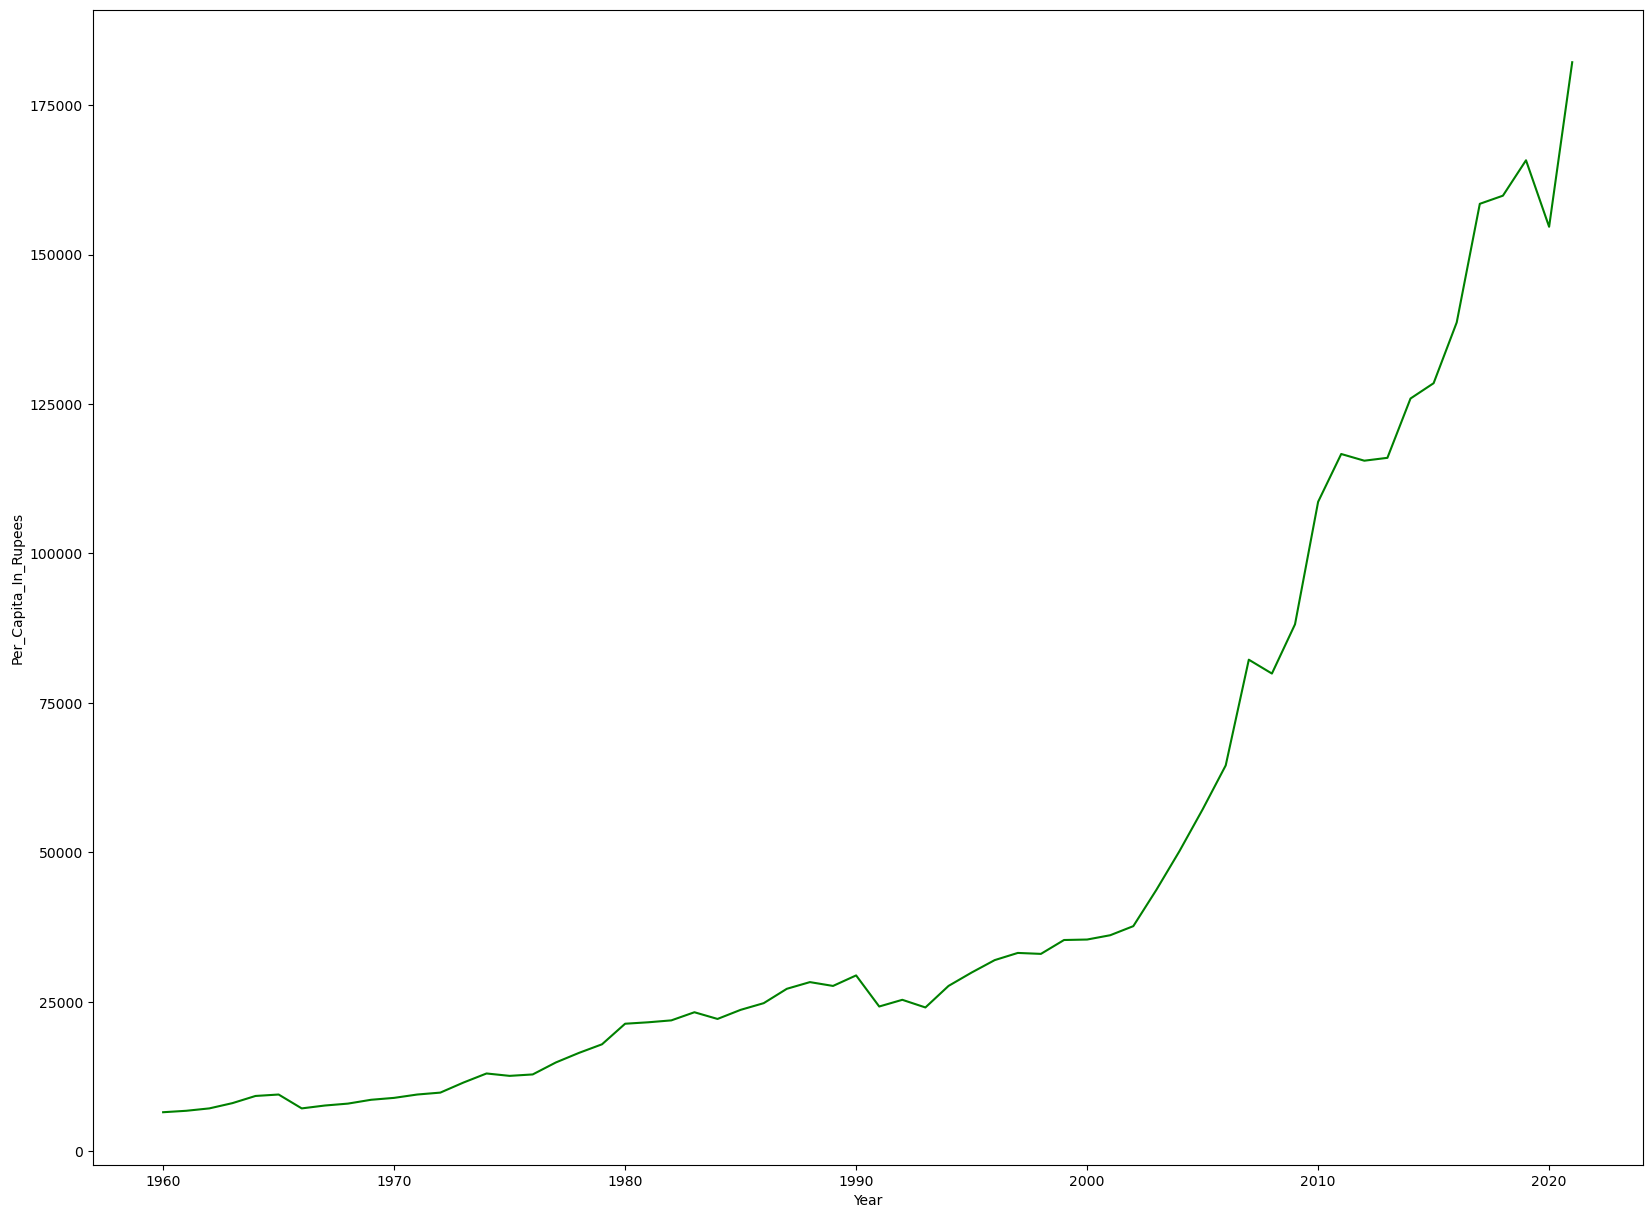

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
sns.lineplot(x=gdp.Year, y=gdp.Per_Capita_In_Rupees, color="green")
# Show the plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


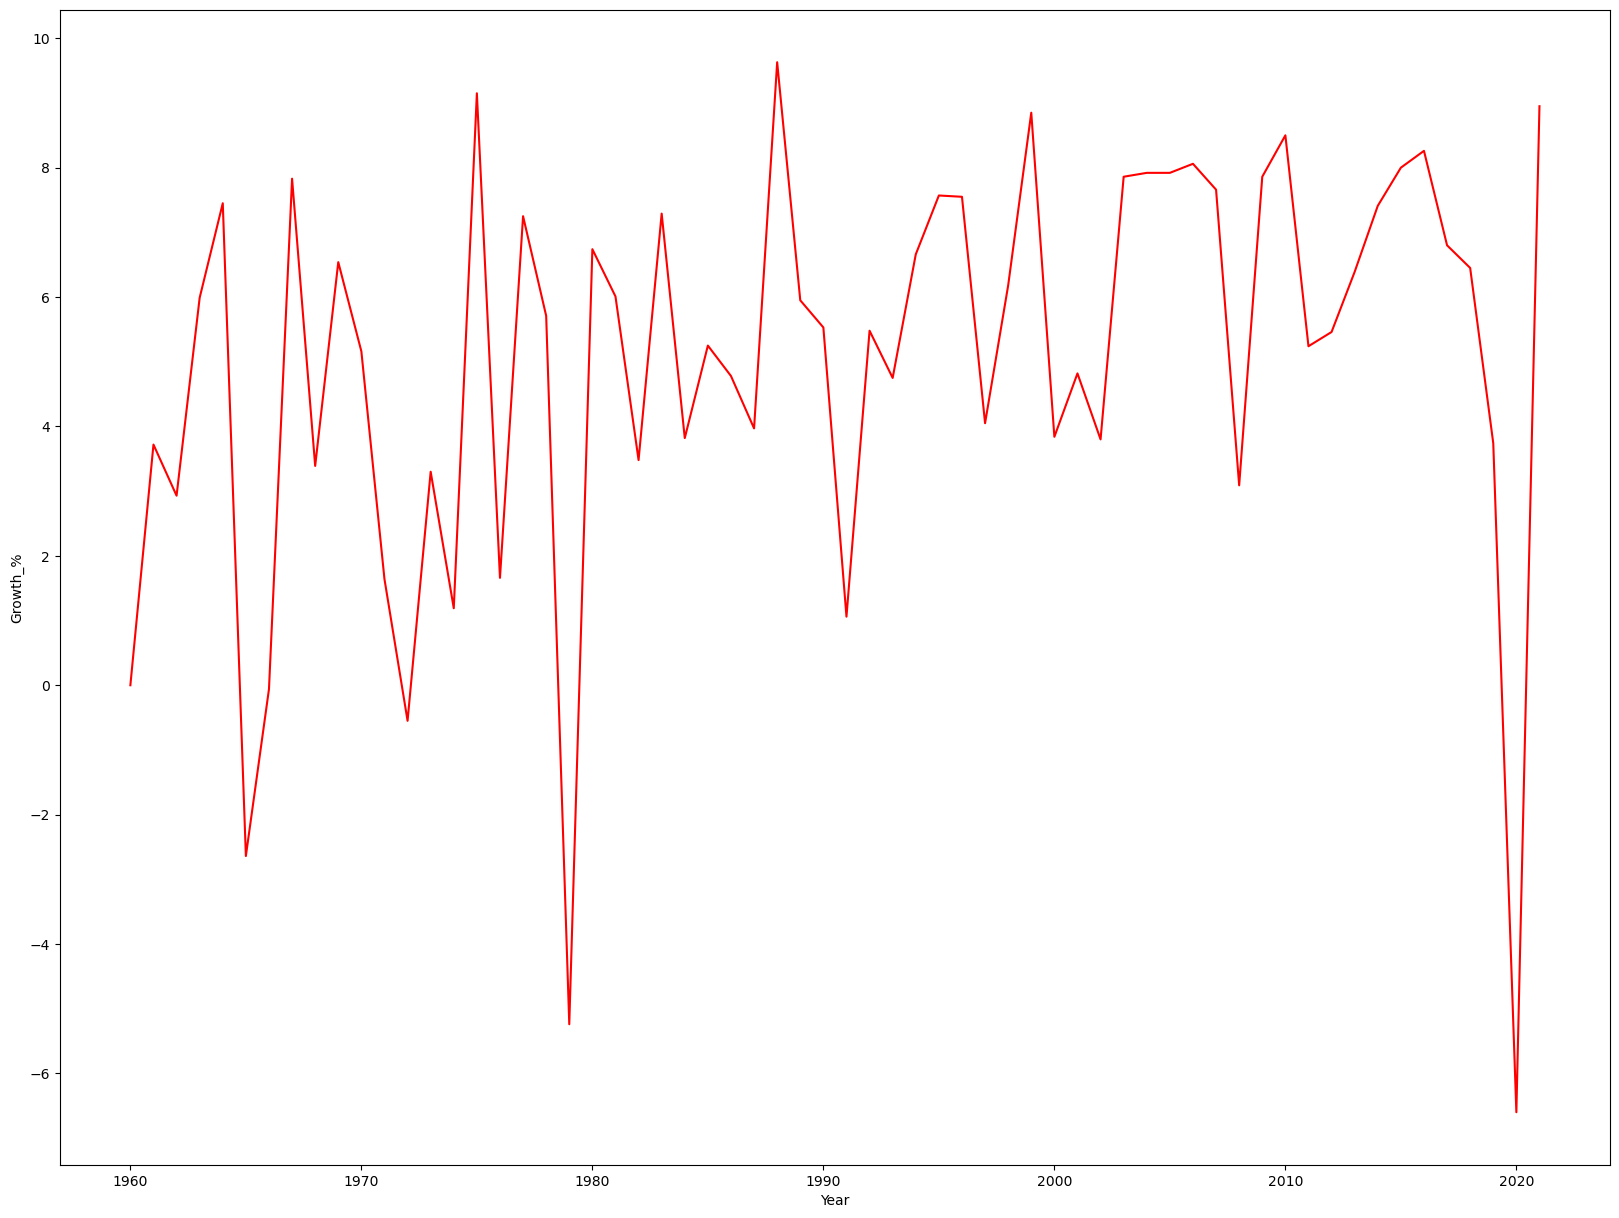

In [25]:
# Plottings using SEABORN and MATPLOTLIB  (lineplot)
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the figure size before the plot
plt.figure(figsize=(20, 15))

sns.lineplot(x=gdp.Year, y=gdp['Growth_%'], color='red') 
# Show the plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

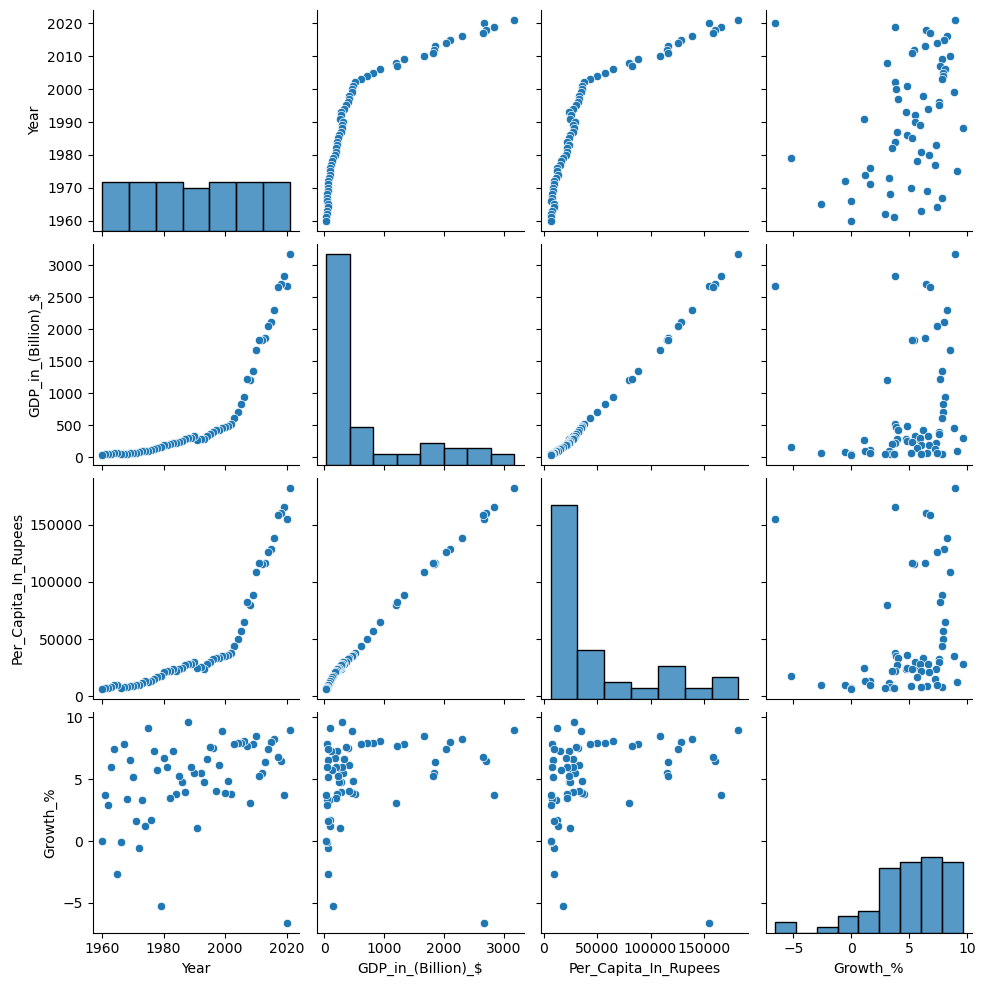

In [29]:
# Plottings using SEABORN and MATPLOTLIB  (pairplot)

sns.pairplot(gdp)
plt.show()

## Input/Output Creation

In [30]:
# Creating input and output for training

ip = gdp.drop('GDP_in_(Billion)_$',axis=1)
op = gdp['GDP_in_(Billion)_$']

## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ip, op, test_size = 0.2)

# The train_test_split function in the Scikit-Learn library splits a dataset 
# into training and testing subsets, facilitating model evaluation by providing 
# separate data for training the model and assessing its performance.

## Standard Scaler 

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# The StandardScaler in the Scikit-Learn library standardizes features by 
# removing the mean and scaling to unit variance.

## Machine Learning Model

In [33]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)

# LinearRegression in the Scikit-Learn library is a simple and widely-used 
# algorithm that models the relationship between a dependent variable and one or 
# more independent variables by fitting a linear equation to observed data. 
# It is used for predicting continuous outcomes.

LinearRegression()

## Prediction

In [34]:
pred = lr.predict(x_test)
pred

# The predict method applies the learned linear relationship to the input 
# features in x_test to make predictions.

array([1305.64202212, -152.80341312,  -90.92416741,  868.32876427,
        -15.73301134, 1292.22590394,   33.89502834, 1375.73950986,
       -104.5782401 ,   62.33067207,  963.21542084,    3.20481595,
       1516.77995987])

## Accuracy

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(pred, y_test)
r2 = r2_score(pred, y_test)

print('Mean Squared Error: ',mse)
print('R2 Score: ',r2)

# mean_squared_error in Scikit-Learn measures the average squared difference 
# between predicted and actual values, indicating the model's prediction accuracy.

# r2_score evaluates the proportion of variance in the dependent variable 
# explained by the model, indicating its goodness of fit.

# Here, we observe that the mean_squared_error is quite high which indicates poor
# prediction accuracy which may be because of the insuffiency of data and 
# data quality present in the dataset. 

Mean Squared Error:  867771.1543205511
R2 Score:  -1.0637645273003673


In [36]:
df = pd.DataFrame({'Y_test':list(y_test),'Prediction':pred})
df

,Y_test,Prediction
0,2702.93,1305.642022
1,50.13,-152.803413
2,102.72,-90.924167
3,1856.72,868.328764
4,152.99,-15.733011
5,2651.47,1292.225904
6,320.98,33.895028
7,2831.55,1375.739510
8,71.46,-104.578240
9,458.82,62.330672


In [2]:
# lmplot
import seaborn as sns
import matplotlib.pyplot as plt

# Add a hue for color (replace 'Category_Column' with your actual column name)
sns.pairplot(gdp)

# Display the plot (optional)
plt.show()


# lmplot combines scatter plots and regression lines to help understand and 
# visualize data trends and correlations.

ModuleNotFoundError: No module named 'seaborn'